In [96]:
# Import the required libraries
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#Read the dataset into pandas dataframe
df = pd.read_csv("C:/Users/USER/Downloads/marketing_AB.csv").drop("Unnamed: 0",axis=1)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [3]:
#Check for missing values
df.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [4]:
#Check for duplicates
df.duplicated().sum()

0

In [5]:
# ensure one `UserID` belongs to one `group`
num_User_group = df[['user id','converted']].groupby('user id')['converted'].nunique()
num_User_group.sort_values(ascending=False)

user id
900000     1
1427238    1
1427232    1
1427233    1
1427234    1
          ..
1199964    1
1199963    1
1199962    1
1199961    1
1654483    1
Name: converted, Length: 588101, dtype: int64

In [23]:
# Obtain descriptive statistics for numerical columns
df.select_dtypes('number').describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [ ]:
#Exploratory Data Analysis (EDA):

In [56]:
#Distribution of test group
df['test group'].value_counts(normalize=True)

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Bar Chart of Distribution of Test Group by Proportion')

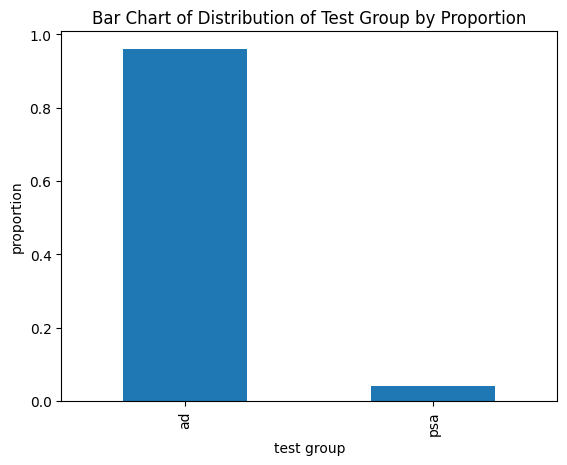

In [57]:
#Visualizing the distribution
df['test group'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('proportion')
plt.title('Bar Chart of Distribution of Test Group by Proportion')

In [27]:
#Conversion Rates per Group
df.groupby('test group')['converted'].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

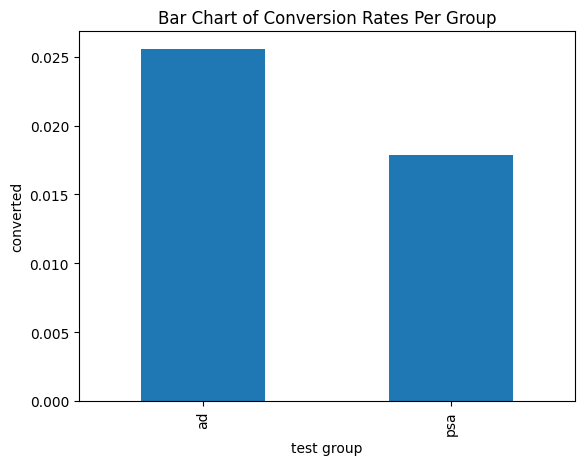

In [58]:
#Visualizing the distribution
df.groupby('test group')['converted'].mean().plot(kind ='bar')
plt.ylabel('converted')
plt.title('Bar Chart of Conversion Rates Per Group')
plt.show()

In [44]:
# Distribution of total ads
df['total ads'].sort_values(ascending = False)

26742     2065
47005     1778
7187      1680
506       1632
15334     1491
          ... 
443546       1
443543       1
443542       1
443541       1
588100       1
Name: total ads, Length: 588101, dtype: int64

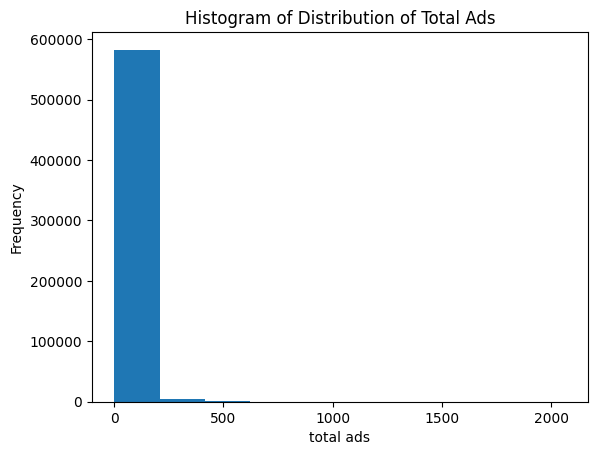

In [55]:
#Visualizing the distribution
df['total ads'].sort_values(ascending = True).plot(kind='hist')
plt.xlabel('total ads')
plt.title('Histogram of Distribution of Total Ads')
plt.show()

In [40]:
#Conversion Rates by total ads
df.groupby('total ads')['converted'].mean()

total ads
1       0.001572
2       0.002360
3       0.002826
4       0.003586
5       0.003447
          ...   
1491    1.000000
1632    0.000000
1680    1.000000
1778    1.000000
2065    0.000000
Name: converted, Length: 807, dtype: float64

Text(0.5, 1.0, 'Histogram of Conversion Rates by Total Ads')

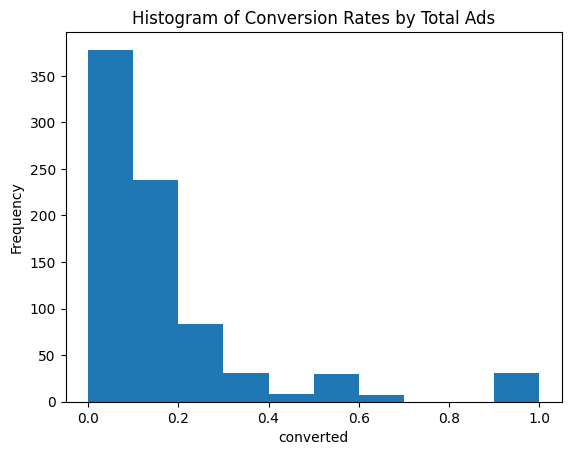

In [54]:
# Visualizing the distribution
df.groupby('total ads')['converted'].mean().plot(kind='hist')
plt.xlabel('converted')
plt.title('Histogram of Conversion Rates by Total Ads')

In [49]:
#most ads day Analysis:
df.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64

<Axes: ylabel='converted'>

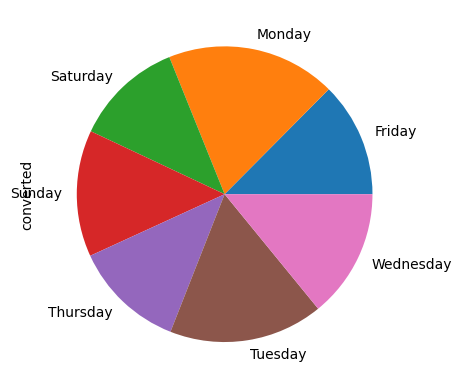

In [50]:
# Visualizing the distribution with pie chart
df.groupby('most ads day')['converted'].mean().plot(kind='pie')

<Axes: title={'center': 'Line Plot of Conversion Rates by most Ads Day'}, xlabel='most ads day', ylabel='converted'>

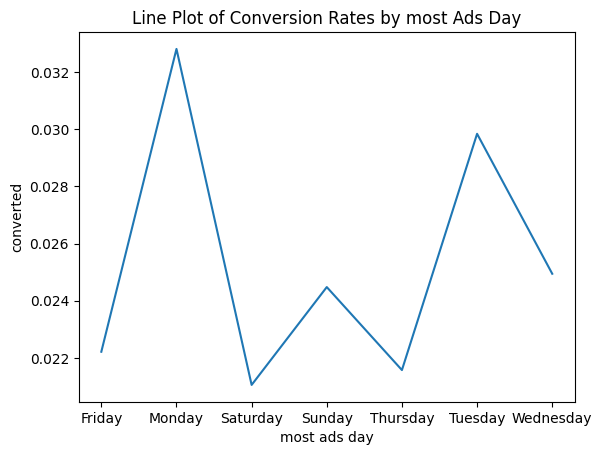

In [53]:
# Visualizing the distribution with line plot
plt.ylabel('converted')
plt.title('Line Plot of Conversion Rates by most Ads Day')
df.groupby('most ads day')['converted'].mean().plot(kind='line')

In [51]:
#most ads hour Analysis:
df.groupby('most ads hour')['converted'].mean()

most ads hour
0     0.018425
1     0.012911
2     0.007313
3     0.010452
4     0.015235
5     0.020915
6     0.022244
7     0.018111
8     0.019516
9     0.019191
10    0.021521
11    0.022116
12    0.023828
13    0.024677
14    0.028063
15    0.029653
16    0.030772
17    0.028210
18    0.027380
19    0.026720
20    0.029803
21    0.028923
22    0.026105
23    0.022662
Name: converted, dtype: float64

<Axes: ylabel='converted'>

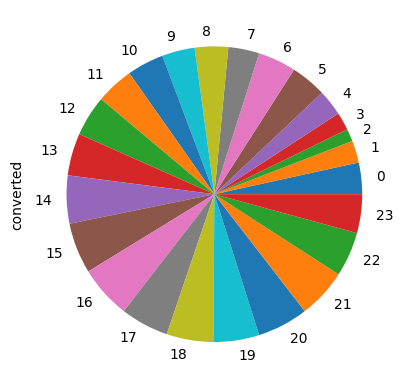

In [59]:
df.groupby('most ads hour')['converted'].mean().plot(kind='pie')

<Axes: xlabel='most ads hour'>

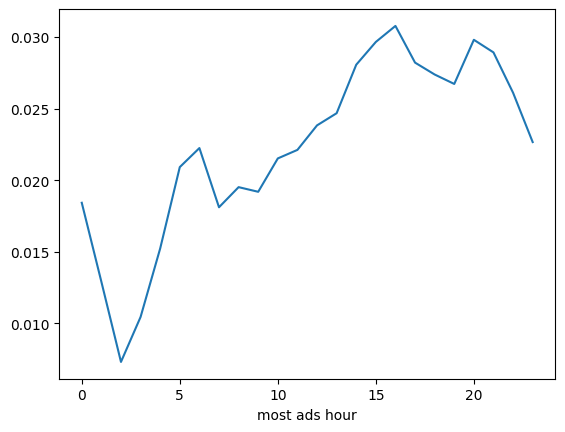

In [60]:
df.groupby('most ads hour')['converted'].mean().plot(kind='line')

In [ ]:
# Objective (i): Analyze Experimental and Control Groups (Were Ads Successful?) and 
#Objective (iii) Assess Statistical Significance using A/B Testing Techniques 


#Hypothesis Formulation:

#Null Hypothesis (H_0): There is no significant difference in conversion rates between
#the 'ad' group and the 'psa' group. (i.e., Conversion Rate_ad = Conversion Rate_psa)

#Alternative Hypothesis (H_1): There is a significant difference in conversion
#rates between the 'ad' group and the 'psa' group. (i.e., Conversion Rate_ad 
#neq Conversion Rate_psa)



In [ ]:
#Statistical Test:

#Since we are comparing proportions (conversion rates) between two independent groups, a Two-Sample Z-test for Proportions 
#(or Chi-Squared test for independence) is appropriate.

In [61]:
#let us perform randomization to guard against confounding variables,
#so that they might be evenly distributed between the two groups.
idx = df.index.to_list()
np.random.shuffle(idx)
df1 = df.loc[idx].reset_index(drop=True)
df1

,user id,test group,converted,total ads,most ads day,most ads hour
0,1475893,ad,False,19,Tuesday,13
1,1220116,ad,False,22,Wednesday,18
2,1423151,ad,False,1,Friday,12
3,1502270,ad,False,1,Sunday,11
4,1319803,ad,False,10,Saturday,14
...,...,...,...,...,...,...
588096,1152194,ad,False,6,Thursday,9
588097,1546636,ad,False,8,Saturday,20
588098,1486607,ad,False,131,Tuesday,22
588099,1652857,ad,False,2,Tuesday,15


In [10]:
#Obtain  treatment group
treatment_group = df[df['test group'] == 'ad']
treatment_group

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [84]:
##Calculate Conversion Rate for treatment group
conversion_rate_ad = df[df['test group'] == 'ad']['converted'].mean()
conversion_rate_ad

0.025546559636683747

In [70]:
# number of users in treatment group
n_ad = df[df['test group'] == 'ad'].shape[0]
n_ad

564577

In [12]:
#Obtain Control group
control_group = df[df['test group'] == 'psa']
control_group

,user id,test group,converted,total ads,most ads day,most ads hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19
...,...,...,...,...,...,...
588052,900959,psa,False,16,Tuesday,22
588063,902828,psa,False,3,Tuesday,22
588066,914578,psa,False,1,Tuesday,22
588069,909042,psa,False,6,Tuesday,22


In [83]:
#Calculate Conversion Rate for control group
conversion_rate_psa = df[df['test group'] == 'psa']['converted'].mean()
conversion_rate_psa


0.01785410644448223

In [71]:
# number of users in control group
n_psa = df[df['test group'] == 'psa'].shape[0]
n_psa

23524

In [72]:
df[df['test group'] == 'ad']['converted'].sum()

14423

In [77]:
df[df['test group'] == 'psa']['converted'].sum()

420

In [80]:
#Perform Z-test for Proportions:
#Many statistical libraries (like statsmodels in Python) have functions for this.

#W'll need the number of conversions and the total number of users in each group.
count_ad = df[df['test group'] == 'ad']['converted'].sum()
count_psa = df[df['test group'] == 'psa']['converted'].sum()

stat, p_value = proportions_ztest([count_ad, count_psa], [n_ad, n_psa])
stat, p_value

(7.3700781265454145, 1.7052807161559727e-13)

In [86]:
# Calculate observed conversion rates
conversion_rate_ad = count_ad / n_ad
conversion_rate_psa = count_psa / n_psa

In [87]:
# --- Set Significance Level ---
alpha = 0.05

# --- 2. Make the Decision (Python Logic) ---

print(f"--- A/B Test Results ---")
print(f"Observed Conversion Rate (Ad Group): {conversion_rate_ad:.4f}")
print(f"Observed Conversion Rate (PSA Group): {conversion_rate_psa:.4f}")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.15f}") # Print with more precision for very small p-values
print(f"Significance Level (alpha): {alpha}")
print("-" * 30)

--- A/B Test Results ---
Observed Conversion Rate (Ad Group): 0.0255
Observed Conversion Rate (PSA Group): 0.0179
Z-statistic: 7.3701
P-value: 0.000000000000171
Significance Level (alpha): 0.05
------------------------------


In [90]:
decision = ""
conclusion = ""

if p_value < alpha:
    decision = "Reject the Null Hypothesis (H0)"
    if conversion_rate_ad > conversion_rate_psa:
        conclusion = (
            "There is statistically significant evidence that the 'ad' campaign "
            "led to a *higher* conversion rate compared to the 'psa' (control) group. "
            "The ads were successful in increasing sales."
        )
    
    elif conversion_rate_ad < conversion_rate_psa:
        conclusion = (
            "There is statistically significant evidence that the 'ad' campaign "
            "led to a *lower* conversion rate compared to the 'psa' (control) group. "
            "The ads were detrimental and decreased sales."
        )
        
    else: # This case is highly unlikely with floating point numbers, but for completeness
        conclusion = (
            "There is statistically significant evidence that the 'ad' campaign "
            "resulted in a different conversion rate compared to the 'psa' group, "
            "but the specific direction of the difference needs further examination "
            "(though unlikely to be exactly equal if p-value is significant)."
        ) 
        
else:
    decision = "Fail to Reject the Null Hypothesis (H0)"
    conclusion = (
        "There is no statistically significant evidence to conclude that the "
        "'ad' campaign led to a different conversion rate compared to the "
        "'psa' (control) group. The observed difference could be due to random chance."
    )

print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")       
        


Decision: Reject the Null Hypothesis (H0)
Conclusion: There is statistically significant evidence that the 'ad' campaign led to a *higher* conversion rate compared to the 'psa' (control) group. The ads were successful in increasing sales.


In [94]:
# 95% Confidence Interval for Ad Group Conversion Rate
lower_ad, upper_ad = proportion_confint(count_ad, n_ad, alpha=alpha, method='wilson')
print(f"\n95% CI for 'ad' group conversion rate: ({lower_ad:.4f}, {upper_ad:.4f})")

# 95% Confidence Interval for PSA Group Conversion Rate
lower_psa, upper_psa = proportion_confint(count_psa, n_psa, alpha=alpha, method='wilson')
print(f"95% CI for 'psa' group conversion rate: ({lower_psa:.4f}, {upper_psa:.4f})")


95% CI for 'ad' group conversion rate: (0.0251, 0.0260)
95% CI for 'psa' group conversion rate: (0.0162, 0.0196)


In [98]:
# Visualizing the difference 

groups = ['Ad Group', 'PSA Group']
conversion_rates = [conversion_rate_ad, conversion_rate_psa]
ci_lower = [lower_ad, lower_psa]
ci_upper = [upper_ad, upper_psa]

# Calculate error bars for plotting
errors = [(conversion_rates[i] - ci_lower[i], ci_upper[i] - conversion_rates[i]) for i in range(len(groups))]
# Reshape for matplotlib errorbar (lower errors, upper errors)
yerr = [[err[0] for err in errors], [err[1] for err in errors]]


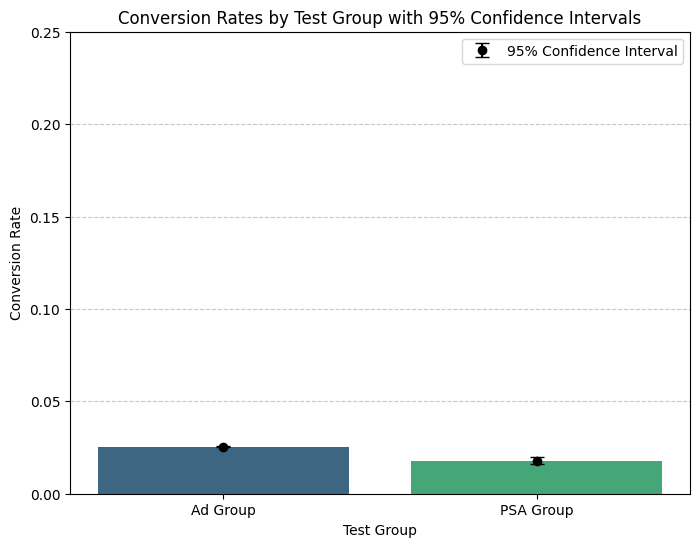

In [99]:
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=conversion_rates, palette='viridis')
plt.errorbar(x=groups, y=conversion_rates, yerr=yerr, fmt='o', color='black', capsize=5, label='95% Confidence Interval')

plt.title('Conversion Rates by Test Group with 95% Confidence Intervals')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(max(ci_upper), 0.2) + 0.05) # Adjust y-lim for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [101]:
#Objective (ii): Estimate Potential Revenue Generated from Ads
#Define Average Revenue Per Sale (ARPS):
#Let's assume, for example, that each conversion generates an average of $50 in revenue. 
#(this number could be got from business intelligence or past sales data).

ARPS = 50
#Calculate Estimated Total Conversions from Ads (if applied to the whole user base):
total_users = df.shape[0]
projected_ad_conversions = total_users * conversion_rate_ad   #(using the conversion rate from the 'ad' group)
projected_ad_conversions

15023.957268893348

In [102]:
#Calculate Estimated Revenue:
estimated_revenue_from_ads = projected_ad_conversions * ARPS
estimated_revenue_from_ads


751197.8634446674

In [ ]:
#Key Findings:

#Significant Uplift in Conversion: The 'ad' group demonstrated a statistically significant higher
#conversion rate of 2.55% compared to the 'psa' group's 1.79%.

#Statistical Significance: The probability of observing such a difference purely by chance is extremely low 
#(p-value = 1.705×10 −13),  confirming that the ad campaign is genuinely more effective.

#Confidence in Results: We are 95% confident that the true conversion rate for users 
#exposed to the ad campaign lies between 2.51 % and 2.60%,while for the PSA group,
# it's between 1.62% and 1.96 %.
#These intervals do not overlap, further reinforcing the significance of our findings.


#Estimated Revenue Impact (Based on Assumption):

#Given the proven higher conversion rate of the 'ad' group, and assuming an average
#revenue per sale (ARPS) of $50 per conversion, 
#scaling this ad strategy across our user base has the potential to generate 
# $751197.86 in additional revenue (excluding ad expenses).


In [ ]:
###  RECOMMENDATIONS

#Full Rollout of the Ad Campaign: We recommend immediately scaling
#the new ad campaign strategy to the broader user base. The data 
#strongly supports its effectiveness in driving conversions and, consequently, sales.

#Strategic Investment in Ad Channels: Based on the success of this
#campaign, we should explore increased investment in the channels and 
#placements where these ads are being shown. Further analysis into the most ads day and most ads
#hour data could provide insights for optimizing ad timing and maximizing efficiency.

#Further Optimization and Segmentation:

#Drill Down into User Behavior: Investigate if certain user segments
#(e.g., users who saw more ads, users who saw ads on specific days/hours) 
#responded even better. This can inform future, more targeted ad strategies.

#Test New Ad Creatives/Messaging: While the current ad strategy 
#is effective, we should continuously experiment with new ad creatives,
#messaging, and offers to identify further opportunities for conversion rate optimization.

#Establish Clear Revenue Tracking for Ads: To precisely quantify the financial 
#return on ad spend, we should ensure robust tracking of revenue generated directly from ad-driven conversions. 
#This will allow for more accurate ROI calculations in future analyses.

